<Axes: >

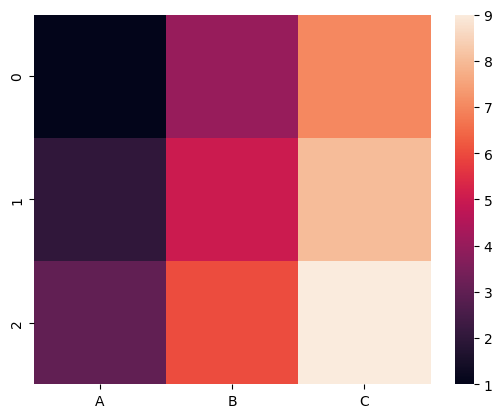

In [1]:
import seaborn as sns
import pandas as pd

data = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})
sns.heatmap(data)

# Output:
# A heatmap visualization of the data


In [2]:
data = pd.read_csv('../data/shiroyang/202404191034.csv')
data = data.dropna()
data = data[['left_gaze_point_on_display_area','right_gaze_point_on_display_area']]
data = data.reset_index().drop('index',axis=1)
data.head(5)

,left_gaze_point_on_display_area,right_gaze_point_on_display_area
0,"(0.1136174127459526, 0.35540205240249634)","(0.11404397338628769, 0.36022236943244934)"
1,"(0.12057899683713913, 0.3464225232601166)","(0.08907215297222137, 0.3487788438796997)"
2,"(0.0978446751832962, 0.25703561305999756)","(0.06838563829660416, 0.276467502117157)"
3,"(0.09678386151790619, 0.2483810931444168)","(0.06276699900627136, 0.26191040873527527)"
4,"(0.0900254100561142, 0.24686163663864136)","(0.052560120820999146, 0.2504134178161621)"


In [3]:
data[['left_gaze_point-X', 'left_gaze_point-Y']] = data['left_gaze_point_on_display_area'].str.strip('()').str.split(',', expand=True)
data[['right_gaze_point-X','right_gaze_point-Y']] = data['right_gaze_point_on_display_area'].str.strip('()').str.split(',',expand=True)

In [4]:
columns = ['left_gaze_point-X','left_gaze_point-Y','right_gaze_point-X','right_gaze_point-Y']

data = data[columns]

data.to_csv('data_set_transformado.csv')

In [ ]:
list(float(a) for a in data['left_gaze_point-X'])

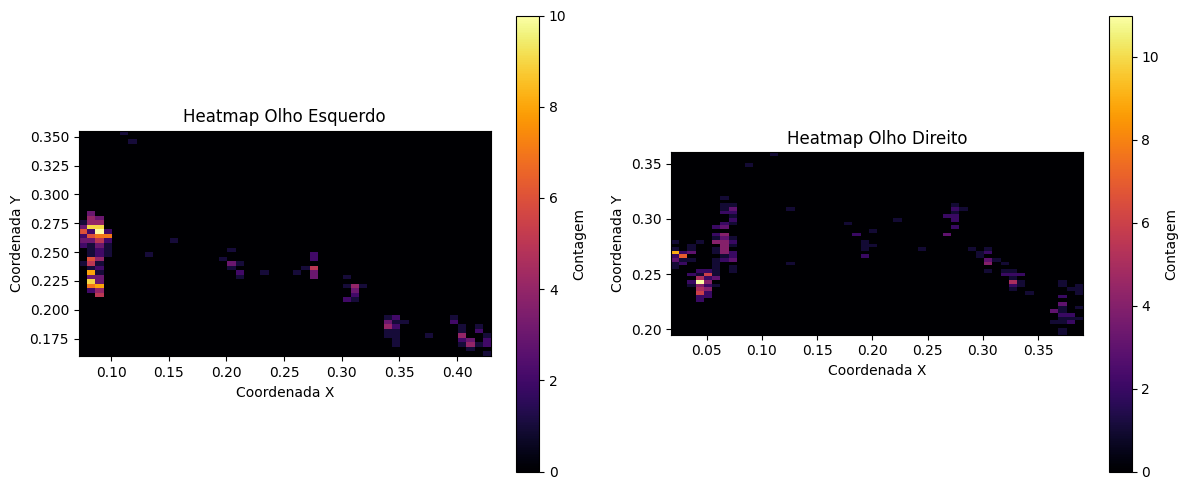

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Suponha que você tenha coordenadas (x, y) para cada olho
# Substitua estas listas pelas suas próprias coordenadas
x_coords_left = list(float(a) for a in data['left_gaze_point-X'])
y_coords_left = list(float(a) for a in data['left_gaze_point-Y'])

x_coords_right = list(float(a) for a in data['right_gaze_point-X'])
y_coords_right = list(float(a) for a in data['right_gaze_point-Y'])

# Criar histogramas 2D dos dados para cada olho
heatmap_left, xedges_left, yedges_left = np.histogram2d(x_coords_left, y_coords_left, bins=50)
heatmap_right, xedges_right, yedges_right = np.histogram2d(x_coords_right, y_coords_right, bins=50)

# Plotar os heatmaps
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(heatmap_left.T, origin='lower', extent=[xedges_left[0], xedges_left[-1], yedges_left[0], yedges_left[-1]], cmap='inferno')
plt.colorbar(label='Contagem')  # Adiciona uma barra de cor indicando a contagem
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Heatmap Olho Esquerdo')

plt.subplot(1, 2, 2)
plt.imshow(heatmap_right.T, origin='lower', extent=[xedges_right[0], xedges_right[-1], yedges_right[0], yedges_right[-1]], cmap='inferno')
plt.colorbar(label='Contagem')  # Adiciona uma barra de cor indicando a contagem
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Heatmap Olho Direito')

plt.tight_layout()
plt.show()


In [ ]:
pip install scipy

In [ ]:
#### TEST
import numpy as np
from scipy.ndimage import gaussian_filter

def generate_gaussian(size_x, size_y, list_array_point, frame_nr, point_lifetime, sd_guass):

    sd_guass = sd_guass / 4

    array_image = np.zeros((size_x, size_y))

    

    for i, array_point in enumerate(list_array_point):

        x = int(array_point[0])

        y = int(array_point[1])


        # Check if the point is inside the image and add it to the heatmap

        if 0 <= y and y < array_image.shape[0] and 0 <= x and x < array_image.shape[1]:

            array_image[y, x] += 1

 

    array_image = gaussian_filter(array_image, sd_guass, mode="constant", cval=0)

    array_image *= 125 

    array_image = np.clip(array_image, 0, 1)

 

    return array_image


In [ ]:
#### TEST
#column_x = ['left_gaze_point-X','right_gaze_point-X']
#column_y = ['left_gaze_point-Y', 'right_gaze_point-Y']
#xs = list(data[column_x])
#ys = list(data[column_y])

tips = sns.load_dataset('tips')
tips.head()
sns.scatterplot(data=data,x='left_gaze_point-X')